In [75]:
# Use this cell to import all the necessary packages that we will use in this analysis

import collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
# In this step the csv with the data that we gonna use is being loaded and we can take a first look on it
cursos_df = pd.read_csv("./data/cursos-prouni.csv")
cursos_df

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,NaN,NaN
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41442,Licenciatura,Curso a Distância,149.00,1.0,NaN,NaN,NaN,994312865605,Sociologia,Paraiso do Tocantins,TO,MTcwMTAwNDE2MTA5,Universidade Paulista - UNIP,PARAISO DO TOCANTINS - Centro,9943,Sociologia,502.36,NaN,NaN,NaN
41443,Tecnológico,Curso a Distância,144.00,1.0,2.0,2.0,5.0,65868712869275,Marketing,Sao VIcente,SP,MzUxNTA2MzUxMDA5,Faculdade de São VIcente - FSV,UNIDADE SEDE - Centro,658687,Marketing,533.34,450.00,450.00,450.00
41444,Tecnológico,Vespertino,139.00,1.0,NaN,NaN,NaN,1056445674232,Gestão de Recursos Humanos,Brasilia,DF,NTMwMTAwMTAwMTA4,Centro Universitário Planalto do Distrito Fede...,DF03 - UNIDADE BRASIL CENTRAL - Taguatinga Nor...,1056445,Gestão de Recursos Humanos,580.76,NaN,NaN,NaN
41445,Bacharelado,Curso a Distância,139.00,1.0,NaN,NaN,NaN,96781210935,Serviço Social,Vitoria,ES,MzIwMzAwOTA1MzA5,Universidade Paulista - UNIP,VITORIA I - Barro Vermelho,9678,Serviço Social,548.26,NaN,NaN,NaN


In [39]:
# As we can see in the previous step we have a lot of NaN fields into the numeric columns, a lot of words with lower and upper
# case formattin and some dispensable columns (curso_id, cidade_filtro and campus_id), for
# our purpose here we can use the curso_busca with the universidade_nome and campus_nome to substitute
# these columns

# So first we gonna remove the dispensable columns to make the dataframe in the shape that we want
cursos_df.drop(["curso_id", "cidade_filtro", "campus_id"], axis=1, inplace=True)


In [54]:
# Second we need to sanitize the data replacing the NaN fields with zeroes and changing the uppercase words
# into lowercase words

cursos_df = cursos_df.fillna(0)
for column in cursos_df:
    if type(cursos_df[column][0]) == str :
        cursos_df[column] = cursos_df[column].str.lower()

In [82]:
# Evaluating if the "curso_busca" and "nome" columns are equal

# First count how many unique values each of it has
print('"curso_busca" has {} unique values in it'.format(cursos_df["curso_busca"].nunique())) # 296 unique values
print('"nome" has {} unique values in it'.format(cursos_df["nome"].nunique())) # 296 unique values, same as "curso_busca"

# Comparsion between the two columns to see if any of the values are different
comparsion_result = np.where(cursos_df["curso_busca"] == cursos_df["nome"], "yes", "no")
result = collections.Counter(comparsion_result)
print("n_yes: {}, n_no: {}".format(result["yes"], result["no"])) # n_yes: 41447, n_no: 0

# With this we conclude that the columns are equal and we can remove one of them, I will remove the "nome"
# column because it can become anbiguous with the other columns with things names

"curso_busca" has 296 unique values in it
"nome" has 296 unique values in it
n_yes: 41447, n_no: 0


In [83]:
 # Removing the "nome column from our dataframe"
 
cursos_df.drop(["nome"], axis=1, inplace=True)

In [95]:
# Now we gonna start to investigate the data from our file
# To clarify this file have the data from the courses and grades from PROUNI 2018

# I'm gonna find the courses, colleges and campus with the higher/lower prices
# and the higher/lower acceptance grades ("integral" and "cotas") per state

# First we gonna find the ones with higher and lower prices
max_mensalidade = cursos_df["mensalidade"].max()
min_mensalidade = cursos_df["mensalidade"].min()

higher_prices = cursos_df.where(cursos_df["mensalidade"] == max_mensalidade).dropna()
lower_prices = cursos_df.where(cursos_df["mensalidade"] == min_mensalidade).dropna()

higher_prices = higher_prices[["curso_busca", "cidade_busca", "uf_busca", "universidade_nome", "campus_nome", "mensalidade"]]
lower_prices = lower_prices[["curso_busca", "cidade_busca", "uf_busca", "universidade_nome", "campus_nome", "mensalidade"]]



,curso_busca,cidade_busca,uf_busca,universidade_nome,campus_nome,mensalidade
41444,gestão de recursos humanos,brasilia,df,centro universitário planalto do distrito fede...,df03 - unidade brasil central - taguatinga nor...,139.0
41445,serviço social,vitoria,es,universidade paulista - unip,vitoria i - barro vermelho,139.0
41446,gestão ambiental,santarem,pa,universidade paulista - unip,santarém - fátima,139.0


In [106]:
max_nota_integral_ampla = cursos_df["nota_integral_ampla"].max()
min_nota_integral_ampla = cursos_df.loc[cursos_df["nota_integral_ampla"] > 0]["nota_integral_ampla"].min()
max_nota_parcial_ampla = cursos_df["nota_parcial_ampla"].max()
min_nota_parcial_ampla = cursos_df.loc[cursos_df["nota_parcial_ampla"] > 0]["nota_parcial_ampla"].min()

higher_grades_integral_ampla = cursos_df.where(cursos_df["nota_integral_ampla"] == max_nota_integral_ampla).dropna()
lower_grades_integral_ampla = cursos_df.where(cursos_df["nota_integral_ampla"] == min_nota_integral_ampla).dropna()
higher_grades_parcial_ampla = cursos_df.where(cursos_df["nota_parcial_ampla"] == max_nota_parcial_ampla).dropna()
lower_grades_parcial_ampla = cursos_df.where(cursos_df["nota_parcial_ampla"] == min_nota_parcial_ampla).dropna()

higher_grades_integral_ampla = higher_grades_integral_ampla[["curso_busca", "cidade_busca", "uf_busca", "universidade_nome", "campus_nome", "nota_integral_ampla"]]
lower_grades_integral_ampla = lower_grades_integral_ampla[["curso_busca", "cidade_busca", "uf_busca", "universidade_nome", "campus_nome", "nota_integral_ampla"]]
higher_grades_parcial_ampla = higher_grades_parcial_ampla[["curso_busca", "cidade_busca", "uf_busca", "universidade_nome", "campus_nome", "nota_parcial_ampla"]]
lower_grades_parcial_ampla = lower_grades_parcial_ampla[["curso_busca", "cidade_busca", "uf_busca", "universidade_nome", "campus_nome", "nota_parcial_ampla"]]

lower_grades_integral_ampla

,curso_busca,cidade_busca,uf_busca,universidade_nome,campus_nome,nota_integral_ampla
2242,enfermagem,sao paulo,sp,universidade ibirapuera - unib,unidade sede - chácara flora - jardim marajoara,450.0
3392,engenharia de petróleo e gás,salvador,ba,faculdade brasileira de tecnologia- - fbt,campus principal - patamares,450.0
3954,administração,pinhalzinho,sc,faculdade dom bosco - fdb,pólo pinhalzinho - centro,450.0
3955,administração,atibaia,sp,faculdade dom bosco - fdb,pólo atibaia - alvianópolis - alvinópolis,450.0
4557,gestão de recursos humanos,curitiba,pr,faculdade dom bosco - fdb,unidade mercês - mercês,450.0
...,...,...,...,...,...,...
41425,gestão comercial,sao paulo,sp,universidade paulista - unip,são paulo xxii - capão redondo,450.0
41426,gestão comercial,sao paulo,sp,universidade paulista - unip,são paulo xxiii - anchieta - jardim santa cruz,450.0
41428,gestão comercial,sao paulo,sp,universidade paulista - unip,são paulo xxvii - norte - vila guilherme,450.0
41429,sociologia,sao pedro,sp,universidade paulista - unip,são pedro - são judas,450.0


In [111]:
courses_w_cotas_full = cursos_df.where(cursos_df["bolsa_integral_cotas"] > 0).dropna()
courses_w_cotas_partial = cursos_df.where(cursos_df["bolsa_parcial_cotas"] > 0).dropna()

max_nota_integral_cotas = courses_w_cotas_full["nota_integral_cotas"].max()
min_nota_integral_cotas = courses_w_cotas_full.loc[cursos_df["nota_integral_cotas"] > 0]["nota_integral_cotas"].min()
max_nota_parcial_cotas = courses_w_cotas_partial["nota_parcial_cotas"].max()
min_nota_parcial_cotas = courses_w_cotas_partial.loc[cursos_df["nota_parcial_cotas"] > 0]["nota_parcial_cotas"].min()

higher_grades_integral_cotas = courses_w_cotas_full.where(courses_w_cotas_full["nota_integral_cotas"] == max_nota_integral_cotas).dropna()
lower_grades_integral_cotas = courses_w_cotas_full.where(courses_w_cotas_full["nota_integral_cotas"] == min_nota_integral_cotas).dropna()
higher_grades_parcial_cotas = courses_w_cotas_partial.where(courses_w_cotas_partial["nota_parcial_cotas"] == max_nota_parcial_cotas).dropna()
lower_grades_parcial_cotas = courses_w_cotas_partial.where(courses_w_cotas_partial["nota_parcial_cotas"] == min_nota_parcial_cotas).dropna()

higher_grades_integral_cotas = higher_grades_integral_cotas[["curso_busca", "cidade_busca", "uf_busca", "universidade_nome", "campus_nome", "nota_integral_cotas"]]
lower_grades_integral_cotas = lower_grades_integral_cotas[["curso_busca", "cidade_busca", "uf_busca", "universidade_nome", "campus_nome", "nota_integral_ampla"]]
higher_grades_parcial_cotas = higher_grades_parcial_cotas[["curso_busca", "cidade_busca", "uf_busca", "universidade_nome", "campus_nome", "nota_parcial_ampla"]]
lower_grades_parcial_cotas = lower_grades_parcial_cotas[["curso_busca", "cidade_busca", "uf_busca", "universidade_nome", "campus_nome", "nota_parcial_ampla"]]

,curso_busca,cidade_busca,uf_busca,universidade_nome,campus_nome,nota_parcial_ampla
137,engenharia eletrônica,curitiba,pr,faculdade anchieta de ensino superior do paran...,unidade sede - cidade industrial,450.00
145,arquitetura e urbanismo,curitiba,pr,faculdade anchieta de ensino superior do paran...,unidade sede - cidade industrial,450.00
147,engenharia ambiental,curitiba,pr,faculdade anchieta de ensino superior do paran...,unidade sede - cidade industrial,450.00
168,jornalismo,curitiba,pr,faculdade anchieta de ensino superior do paran...,unidade sede - cidade industrial,450.00
263,administração,curitiba,pr,faculdade anchieta de ensino superior do paran...,unidade sede - cidade industrial,450.00
...,...,...,...,...,...,...
40973,teologia,sao paulo,sp,faculdade messianica,campus - são paulo - vila mariana - vila mariana,489.28
40974,teologia,sao paulo,sp,faculdade messianica,polo na sede - vila mariana,450.00
40977,teologia,sorocaba,sp,centro universitário internacional - uninter -...,pap sorocaba - centro,450.00
40989,gestão da qualidade,sao vicente,sp,faculdade de são vicente - fsv,unidade sede - centro,450.00


In [113]:
# In this step we gonna isolate the data to just the City of Curitiba in the State of Paraná

curitiba_df = cursos_df.loc[cursos_df["cidade_busca"] == "curitiba"]

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca,cidade_busca,uf_busca,universidade_nome,campus_nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
14,licenciatura,matutino,8466.72,1.0,2.0,0.0,0.0,educação física,curitiba,pr,faculdade dom bosco - fdb,unidade mercês - mercês,579.20,570.40,0.00,0.0
15,bacharelado,matutino,8466.72,1.0,4.0,0.0,0.0,educação física,curitiba,pr,faculdade dom bosco - fdb,unidade mercês - mercês,589.08,577.32,0.00,0.0
19,bacharelado,integral,8290.00,0.0,7.0,0.0,0.0,medicina,curitiba,pr,pontifícia universidade católica do paraná - p...,pucpr - campus curitiba - prado velho,760.04,0.00,0.00,0.0
33,bacharelado,matutino,7946.35,1.0,2.0,0.0,0.0,psicologia,curitiba,pr,faculdade dom bosco - fdb,marumby - lindóia,604.02,627.78,0.00,0.0
35,bacharelado,integral,7920.00,7.0,19.0,0.0,0.0,medicina,curitiba,pr,universidade positivo - up,universidade positivo - campus sede - campo co...,742.40,726.60,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40813,bacharelado,curso a distância,189.00,1.0,1.0,1.0,3.0,teologia,curitiba,pr,centro universitário internacional - uninter -...,pap curitiba 09 - centro,542.64,450.00,515.62,450.0
40814,bacharelado,curso a distância,189.00,0.0,0.0,0.0,1.0,teologia,curitiba,pr,centro universitário internacional - uninter -...,pap curitiba 10 - sítio cercado,0.00,0.00,474.24,0.0
41127,tecnológico,curso a distância,159.00,0.0,1.0,0.0,0.0,gestão ambiental,curitiba,pr,centro universitário leonardo da vinci - unias...,polo de apoio presencial de curitiba/pr - portao,482.86,0.00,0.00,0.0
41281,licenciatura,curso a distância,149.00,0.0,1.0,0.0,0.0,sociologia,curitiba,pr,universidade paulista - unip,curitiba i - batel,540.20,0.00,0.00,0.0


In [145]:
# Here we gonna find the average, maximum and minimum price and grade for every course in Curitiba
# we also can use describe for it, but our goal here is to study the pandas library

average_price_grades_ctba = curitiba_df[["curso_busca", "mensalidade", "nota_integral_ampla", "nota_integral_cotas", "nota_parcial_ampla", "nota_parcial_cotas"]]
average_price_grades_ctba = average_price_grades_ctba.groupby("curso_busca").mean()

max_price_grades_ctba = curitiba_df[["curso_busca", "mensalidade", "nota_integral_ampla", "nota_integral_cotas", "nota_parcial_ampla", "nota_parcial_cotas"]]
max_price_grades_ctba = average_price_grades_ctba.groupby("curso_busca").max()

min_price_grades_ctba = curitiba_df[["curso_busca", "mensalidade", "nota_integral_ampla", "nota_integral_cotas", "nota_parcial_ampla", "nota_parcial_cotas"]]
min_price_grades_ctba = average_price_grades_ctba.groupby("curso_busca").min()

In [146]:
# Renaming the columns names so we can merge the three dataframes in one
# As initialy all the dataframes have the same columns we can iterate just one time to change the names

for column in average_price_grades_ctba:
    if column != "curso_busca":
        average_price_grades_ctba = average_price_grades_ctba.rename(columns={column:"avg_"+column})
        max_price_grades_ctba = max_price_grades_ctba.rename(columns={column:"max_"+column})
        min_price_grades_ctba = min_price_grades_ctba.rename(columns={column:"min_"+column})


In [147]:
# Now we can join all the dataframes in one

prices_grades_ctba = pd.merge(left=average_price_grades_ctba, right=max_price_grades_ctba, how="left",on="curso_busca")
prices_grades_ctba = pd.merge(left=prices_grades_ctba, right=min_price_grades_ctba, how="left", on="curso_busca")


,avg_mensalidade,avg_nota_integral_ampla,avg_nota_integral_cotas,avg_nota_parcial_ampla,avg_nota_parcial_cotas,max_mensalidade,max_nota_integral_ampla,max_nota_integral_cotas,max_nota_parcial_ampla,max_nota_parcial_cotas,min_mensalidade,min_nota_integral_ampla,min_nota_integral_cotas,min_nota_parcial_ampla,min_nota_parcial_cotas
curso_busca,,,,,,,,,,,,,,,
administração,1019.666346,474.418462,301.738846,295.369615,173.007692,1019.666346,474.418462,301.738846,295.369615,173.007692,1019.666346,474.418462,301.738846,295.369615,173.007692
agronegócio,393.350000,547.570000,0.000000,0.000000,0.000000,393.350000,547.570000,0.000000,0.000000,0.000000,393.350000,547.570000,0.000000,0.000000,0.000000
agronomia,1730.525000,460.535000,0.000000,314.365000,0.000000,1730.525000,460.535000,0.000000,314.365000,0.000000,1730.525000,460.535000,0.000000,314.365000,0.000000
análise e desenvolvimento de sistemas,673.401600,490.012800,302.492800,228.932800,116.418400,673.401600,490.012800,302.492800,228.932800,116.418400,673.401600,490.012800,302.492800,228.932800,116.418400
arquitetura e urbanismo,2146.701538,542.441538,189.341538,350.396923,169.884615,2146.701538,542.441538,189.341538,350.396923,169.884615,2146.701538,542.441538,189.341538,350.396923,169.884615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sistemas para internet,541.675000,553.800000,0.000000,0.000000,0.000000,541.675000,553.800000,0.000000,0.000000,0.000000,541.675000,553.800000,0.000000,0.000000,0.000000
sociologia,233.000000,440.428000,0.000000,273.860000,190.580000,233.000000,440.428000,0.000000,273.860000,190.580000,233.000000,440.428000,0.000000,273.860000,190.580000
teatro,845.000000,660.280000,0.000000,0.000000,0.000000,845.000000,660.280000,0.000000,0.000000,0.000000,845.000000,660.280000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='count', ylabel='curso_busca'>

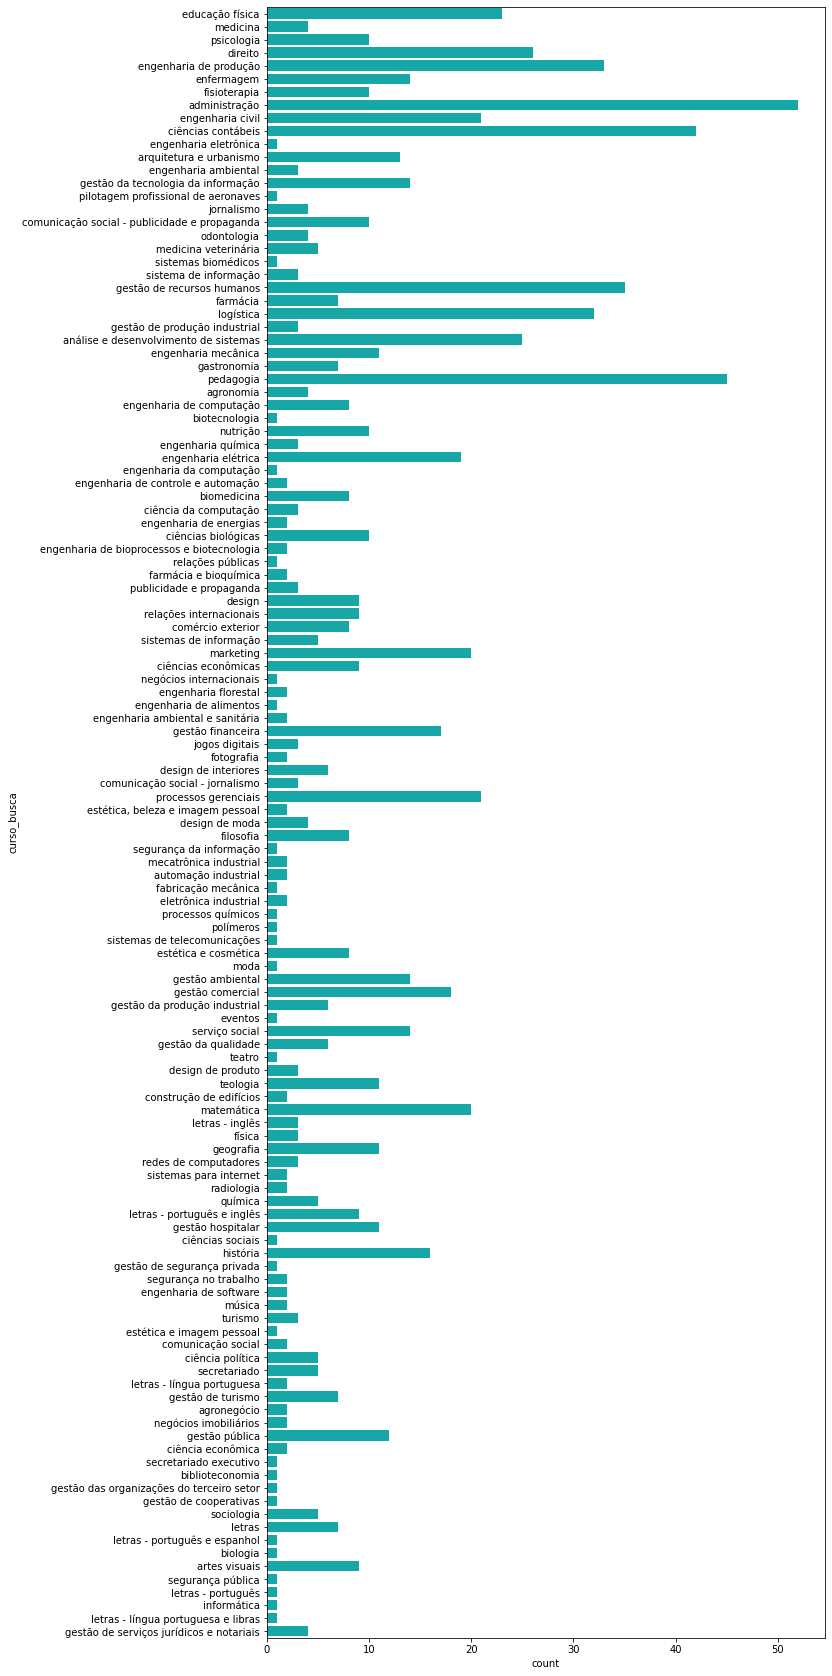

In [194]:
# Now we gonna plot some information visually about the number of courses existing in the city
# so first we gonna count how many courses we have for each type

courses_count = curitiba_df["curso_busca"].value_counts().reset_index()
courses_count = courses_count.rename(columns={"index": "course", "curso_busca": "count"})

f, ax = plt.subplots(figsize=(10,30))
sns.countplot(y="curso_busca", data=curitiba_df, color="c")